In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [2]:
df = pd.read_pickle("./data/rolling_averages_with_opponent.pkl")
df = df.dropna()
df = df.drop_duplicates(subset=["GAME_ID"], keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9389 entries, 34 to 19036
Columns: 180 entries, GAME_ID to PLUS_MINUS
dtypes: float64(174), int64(2), object(4)
memory usage: 13.0+ MB


In [3]:
df.describe()

,TEAM_ID,FGM_AVG,FGA_AVG,FG_PCT_AVG,FG3M_AVG,FG3A_AVG,FG3_PCT_AVG,FTM_AVG,FTA_AVG,FT_PCT_AVG,OREB_AVG,DREB_AVG,REB_AVG,AST_AVG,STL_AVG,BLK_AVG,TO_AVG,PF_AVG,PTS_AVG,E_OFF_RATING_AVG,OFF_RATING_AVG,E_DEF_RATING_AVG,DEF_RATING_AVG,E_NET_RATING_AVG,NET_RATING_AVG,AST_PCT_AVG,AST_TOV_AVG,AST_RATIO_AVG,OREB_PCT_AVG,DREB_PCT_AVG,REB_PCT_AVG,E_TM_TOV_PCT_AVG,TM_TOV_PCT_AVG,EFG_PCT_AVG,TS_PCT_AVG,E_USG_PCT_AVG,E_PACE_AVG,PACE_AVG,PACE_PER40_AVG,POSS_AVG,PIE_AVG,FTA_RATE_AVG,OPP_EFG_PCT_AVG,OPP_FTA_RATE_AVG,OPP_TOV_PCT_AVG,OPP_OREB_PCT_AVG,PTS_OFF_TOV_AVG,PTS_2ND_CHANCE_AVG,PTS_FB_AVG,PTS_PAINT_AVG,OPP_PTS_OFF_TOV_AVG,OPP_PTS_2ND_CHANCE_AVG,OPP_PTS_FB_AVG,OPP_PTS_PAINT_AVG,BLKA_AVG,PFD_AVG,PCT_FGA_2PT_AVG,PCT_FGA_3PT_AVG,PCT_PTS_2PT_AVG,PCT_PTS_2PT_MR_AVG,PCT_PTS_3PT_AVG,PCT_PTS_FB_AVG,PCT_PTS_FT_AVG,PCT_PTS_OFF_TOV_AVG,PCT_PTS_PAINT_AVG,PCT_AST_2PM_AVG,PCT_UAST_2PM_AVG,PCT_AST_3PM_AVG,PCT_UAST_3PM_AVG,PCT_AST_FGM_AVG,PCT_UAST_FGM_AVG,DIST_AVG,ORBC_AVG,DRBC_AVG,RBC_AVG,TCHS_AVG,SAST_AVG,FTAST_AVG,PASS_AVG,CFGM_AVG,CFGA_AVG,CFG_PCT_AVG,UFGM_AVG,UFGA_AVG,UFG_PCT_AVG,DFGM_AVG,DFGA_AVG,DFG_PCT_AVG,FGM_OPP_AVG,FGA_OPP_AVG,FG_PCT_OPP_AVG,FG3M_OPP_AVG,FG3A_OPP_AVG,FG3_PCT_OPP_AVG,FTM_OPP_AVG,FTA_OPP_AVG,FT_PCT_OPP_AVG,OREB_OPP_AVG,DREB_OPP_AVG,REB_OPP_AVG,AST_OPP_AVG,STL_OPP_AVG,BLK_OPP_AVG,TO_OPP_AVG,PF_OPP_AVG,PTS_OPP_AVG,E_OFF_RATING_OPP_AVG,OFF_RATING_OPP_AVG,E_DEF_RATING_OPP_AVG,DEF_RATING_OPP_AVG,E_NET_RATING_OPP_AVG,NET_RATING_OPP_AVG,AST_PCT_OPP_AVG,AST_TOV_OPP_AVG,AST_RATIO_OPP_AVG,OREB_PCT_OPP_AVG,DREB_PCT_OPP_AVG,REB_PCT_OPP_AVG,E_TM_TOV_PCT_OPP_AVG,TM_TOV_PCT_OPP_AVG,EFG_PCT_OPP_AVG,TS_PCT_OPP_AVG,E_USG_PCT_OPP_AVG,E_PACE_OPP_AVG,PACE_OPP_AVG,PACE_PER40_OPP_AVG,POSS_OPP_AVG,PIE_OPP_AVG,FTA_RATE_OPP_AVG,OPP_EFG_PCT_OPP_AVG,OPP_FTA_RATE_OPP_AVG,OPP_TOV_PCT_OPP_AVG,OPP_OREB_PCT_OPP_AVG,PTS_OFF_TOV_OPP_AVG,PTS_2ND_CHANCE_OPP_AVG,PTS_FB_OPP_AVG,PTS_PAINT_OPP_AVG,OPP_PTS_OFF_TOV_OPP_AVG,OPP_PTS_2ND_CHANCE_OPP_AVG,OPP_PTS_FB_OPP_AVG,OPP_PTS_PAINT_OPP_AVG,BLKA_OPP_AVG,PFD_OPP_AVG,PCT_FGA_2PT_OPP_AVG,PCT_FGA_3PT_OPP_AVG,PCT_PTS_2PT_OPP_AVG,PCT_PTS_2PT_MR_OPP_AVG,PCT_PTS_3PT_OPP_AVG,PCT_PTS_FB_OPP_AVG,PCT_PTS_FT_OPP_AVG,PCT_PTS_OFF_TOV_OPP_AVG,PCT_PTS_PAINT_OPP_AVG,PCT_AST_2PM_OPP_AVG,PCT_UAST_2PM_OPP_AVG,PCT_AST_3PM_OPP_AVG,PCT_UAST_3PM_OPP_AVG,PCT_AST_FGM_OPP_AVG,PCT_UAST_FGM_OPP_AVG,DIST_OPP_AVG,ORBC_OPP_AVG,DRBC_OPP_AVG,RBC_OPP_AVG,TCHS_OPP_AVG,SAST_OPP_AVG,FTAST_OPP_AVG,PASS_OPP_AVG,CFGM_OPP_AVG,CFGA_OPP_AVG,CFG_PCT_OPP_AVG,UFGM_OPP_AVG,UFGA_OPP_AVG,UFG_PCT_OPP_AVG,DFGM_OPP_AVG,DFGA_OPP_AVG,DFG_PCT_OPP_AVG,PLUS_MINUS
count,9.389000e+03,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000

In [4]:
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,FGM_AVG,FGA_AVG,FG_PCT_AVG,FG3M_AVG,FG3A_AVG,FG3_PCT_AVG,FTM_AVG,FTA_AVG,FT_PCT_AVG,OREB_AVG,DREB_AVG,REB_AVG,AST_AVG,STL_AVG,BLK_AVG,TO_AVG,PF_AVG,PTS_AVG,E_OFF_RATING_AVG,OFF_RATING_AVG,E_DEF_RATING_AVG,DEF_RATING_AVG,E_NET_RATING_AVG,NET_RATING_AVG,AST_PCT_AVG,AST_TOV_AVG,AST_RATIO_AVG,OREB_PCT_AVG,DREB_PCT_AVG,REB_PCT_AVG,E_TM_TOV_PCT_AVG,TM_TOV_PCT_AVG,EFG_PCT_AVG,TS_PCT_AVG,E_USG_PCT_AVG,E_PACE_AVG,PACE_AVG,PACE_PER40_AVG,POSS_AVG,PIE_AVG,FTA_RATE_AVG,OPP_EFG_PCT_AVG,OPP_FTA_RATE_AVG,OPP_TOV_PCT_AVG,OPP_OREB_PCT_AVG,PTS_OFF_TOV_AVG,PTS_2ND_CHANCE_AVG,PTS_FB_AVG,PTS_PAINT_AVG,OPP_PTS_OFF_TOV_AVG,OPP_PTS_2ND_CHANCE_AVG,OPP_PTS_FB_AVG,OPP_PTS_PAINT_AVG,BLKA_AVG,PFD_AVG,PCT_FGA_2PT_AVG,PCT_FGA_3PT_AVG,PCT_PTS_2PT_AVG,PCT_PTS_2PT_MR_AVG,PCT_PTS_3PT_AVG,PCT_PTS_FB_AVG,PCT_PTS_FT_AVG,PCT_PTS_OFF_TOV_AVG,PCT_PTS_PAINT_AVG,PCT_AST_2PM_AVG,PCT_UAST_2PM_AVG,PCT_AST_3PM_AVG,PCT_UAST_3PM_AVG,PCT_AST_FGM_AVG,PCT_UAST_FGM_AVG,DIST_AVG,ORBC_AVG,DRBC_AVG,RBC_AVG,TCHS_AVG,SAST_AVG,FTAST_AVG,PASS_AVG,CFGM_AVG,CFGA_AVG,CFG_PCT_AVG,UFGM_AVG,UFGA_AVG,UFG_PCT_AVG,DFGM_AVG,DFGA_AVG,DFG_PCT_AVG,OPP_TEAM_ID,OPP_TEAM_ABBREVIATION,FGM_OPP_AVG,FGA_OPP_AVG,FG_PCT_OPP_AVG,FG3M_OPP_AVG,FG3A_OPP_AVG,FG3_PCT_OPP_AVG,FTM_OPP_AVG,FTA_OPP_AVG,FT_PCT_OPP_AVG,OREB_OPP_AVG,DREB_OPP_AVG,REB_OPP_AVG,AST_OPP_AVG,STL_OPP_AVG,BLK_OPP_AVG,TO_OPP_AVG,PF_OPP_AVG,PTS_OPP_AVG,E_OFF_RATING_OPP_AVG,OFF_RATING_OPP_AVG,E_DEF_RATING_OPP_AVG,DEF_RATING_OPP_AVG,E_NET_RATING_OPP_AVG,NET_RATING_OPP_AVG,AST_PCT_OPP_AVG,AST_TOV_OPP_AVG,AST_RATIO_OPP_AVG,OREB_PCT_OPP_AVG,DREB_PCT_OPP_AVG,REB_PCT_OPP_AVG,E_TM_TOV_PCT_OPP_AVG,TM_TOV_PCT_OPP_AVG,EFG_PCT_OPP_AVG,TS_PCT_OPP_AVG,E_USG_PCT_OPP_AVG,E_PACE_OPP_AVG,PACE_OPP_AVG,PACE_PER40_OPP_AVG,POSS_OPP_AVG,PIE_OPP_AVG,FTA_RATE_OPP_AVG,OPP_EFG_PCT_OPP_AVG,OPP_FTA_RATE_OPP_AVG,OPP_TOV_PCT_OPP_AVG,OPP_OREB_PCT_OPP_AVG,PTS_OFF_TOV_OPP_AVG,PTS_2ND_CHANCE_OPP_AVG,PTS_FB_OPP_AVG,PTS_PAINT_OPP_AVG,OPP_PTS_OFF_TOV_OPP_AVG,OPP_PTS_2ND_CHANCE_OPP_AVG,OPP_PTS_FB_OPP_AVG,OPP_PTS_PAINT_OPP_AVG,BLKA_OPP_AVG,PFD_OPP_AVG,PCT_FGA_2PT_OPP_AVG,PCT_FGA_3PT_OPP_AVG,PCT_PTS_2PT_OPP_AVG,PCT_PTS_2PT_MR_OPP_AVG,PCT_PTS_3PT_OPP_AVG,PCT_PTS_FB_OPP_AVG,PCT_PTS_FT_OPP_AVG,PCT_PTS_OFF_TOV_OPP_AVG,PCT_PTS_PAINT_OPP_AVG,PCT_AST_2PM_OPP_AVG,PCT_UAST_2PM_OPP_AVG,PCT_AST_3PM_OPP_AVG,PCT_UAST_3PM_OPP_AVG,PCT_AST_FGM_OPP_AVG,PCT_UAST_FGM_OPP_AVG,DIST_OPP_AVG,ORBC_OPP_AVG,DRBC_OPP_AVG,RBC_OPP_AVG,TCHS_OPP_AVG,SAST_OPP_AVG,FTAST_OPP_AVG,PASS_OPP_AVG,CFGM_OPP_AVG,CFGA_OPP_AVG,CFG_PCT_OPP_AVG,UFGM_OPP_AVG,UFGA_OPP_AVG,UFG_PCT_OPP_AVG,DFGM_OPP_AVG,DFGA_OPP_AVG,DFG_PCT_OPP_AVG,PLUS_MINUS
34,0021500018,1610612754,IND,32.0,86.0,0.372,9.0,23.0,0.391,26.0,31.0,0.839,8.0,32.0,40.0,23.0,14.0,3.0,13.0,30.0,99.0,94.6,95.2,97.1,101.9,-2.5,-6.7,0.719,1.77,17.0,0.193,0.700,0.430,12.424,12.5,0.424,0.497,0.201,106.90,104.0,86.67,104.0,0.477,0.360,0.494,0.488,0.192,0.300,18.0,10.0,20.0,36.0,12.0,22.0,9.0,46.0,2.0,24.0,0.733,0.267,0.465,0.101,0.273,0.202,0.263,0.182,0.364,0.609,0.391,1.000,0.000,0.719,0.281,16.82,41.0,73.0,108.0,421.0,2.0,0.0,295.0,22.0,51.0,0.431,14.0,29.0,0.483,14.0,20.0,0.700,1610612763,MEM,29.0,82.0,0.354,2.0,16.0,0.125,16.0,22.0,0.7270,11.0,29.0,40.0,15.0,8.0,3.0,16.0,18.0,76.0,78.6,78.40,107.60,108.2,-29.00,-29.8,0.5170,0.940,12.2,0.2140,0.6810,0.427,16.5490,16.5,0.3660,0.4140,0.201,97.58,97.50,81.25,97.0,0.3000,0.2680,0.565,0.202,0.1930,0.3190,12.0,7.0,8.0,36.0,23.0,14.0,26.0,48.0,2.0,25.0,0.805,0.195,0.7110,0.2370,0.079,0.105,0.2110,0.1580,0.4740,0.481,0.519,1.0000,0.0000,0.5170,0.4830,16.650,32.0,65.0,94.0,420.0,6.0,1.0,303.0,18.0,31.0,0.581,23.0,53.0,0.434,11.0,18.0,0.611,-9
36,0021500019,1610612752,NYK,42.0,93.0,0.452,9.0,23.0,0.391,29.0,35.0,0.829,19.0,30.0,49.0,24.0,11.0,7.0,11.0,28.0,122.0,121.5,124.5,97.4,98.0,24.2,26.5,0.571,2.18,16.7,0.389,0.614,0.505,10.956,11.2,0.500,0.563,0.198,100.02,98.5,82.08,98.0,0.646,0.376,0.401,0.360,0.181,0.386,25.0,17.0,19.0,50.0,14.0,23.0,8.0,38.0,4.0,27.0,0.753,0.247,0.541,0.131,0.221,0.156,0.238,0

# Modeling on scaled data

In [5]:
cols = df.drop(columns=["GAME_ID","TEAM_ID","TEAM_ABBREVIATION","OPP_TEAM_ID","OPP_TEAM_ABBREVIATION","PLUS_MINUS"]).columns
target = "PLUS_MINUS"
X = df[cols].values
y = df[target].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Standard scaling

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("MSE of xgboost: ", mean_squared_error(y_test, y_pred))
print("R2 of xgboost: ", r2_score(y_test, y_pred))

MSE of xgboost:  210.3532276060485
R2 of xgboost:  -0.009869448428897032


In [8]:

cat = CatBoostRegressor(random_state=42, verbose=0)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

print("MSE of catboost: ", mean_squared_error(y_test, y_pred))
print("R2 of catboost: ", r2_score(y_test, y_pred))

MSE of catboost:  182.85599914357783
R2 of catboost:  0.12213998758852396


In [9]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean squared error of linear regression: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score of linear regression: %.2f' % r2_score(y_test, y_pred))

Mean squared error of linear regression: 181.90
R2 score of linear regression: 0.13


In [22]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean squared error of random forest: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score of random forest: %.2f' % r2_score(y_test, y_pred))

Mean squared error of random forest: 182.96
R2 score of random forest: 0.12


## Minimum maximum scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# use xgboost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("MSE of xgboost: ", mean_squared_error(y_test, y_pred))
print("R2 of xgboost: ", r2_score(y_test, y_pred))

MSE of xgboost:  210.3532276060485
R2 of xgboost:  -0.009869448428897032


In [12]:
# use catboost
cat = CatBoostRegressor(random_state=42, verbose=0)

cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

print("MSE of catboost: ", mean_squared_error(y_test, y_pred))
print("R2 of catboost: ", r2_score(y_test, y_pred))

MSE of catboost:  182.85665635468584
R2 of catboost:  0.12213683243171136


In [11]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean squared error of linear regression: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score of linear regression: %.2f' % r2_score(y_test, y_pred))

Mean squared error of linear regression: 181.90
R2 score of linear regression: 0.13


In [26]:

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean squared error of random forest: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score of random forest: %.2f' % r2_score(y_test, y_pred))

Mean squared error of random forest: 182.95
R2 score of random forest: 0.12


# PCA

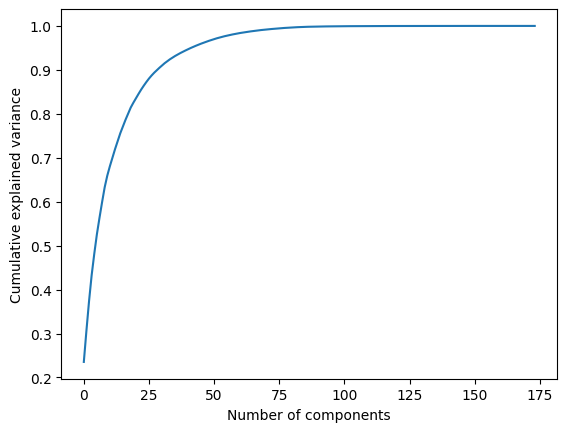

In [12]:
# perform full pca on the data
# try to find the optimal number of components
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train)
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.show()


In [13]:
# Use pca where 90% of the variance is explained
pca = PCA(n_components=0.90)
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)


In [14]:
X_train_pca.shape

(7511, 30)

In [25]:
# use xgboost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_pca, y_train)

y_pred = xgb.predict(X_test_pca)

print("MSE of xgboost: ", mean_squared_error(y_test, y_pred))
print("R2 of xgboost: ", r2_score(y_test, y_pred))

MSE of xgboost:  213.11391313942192
R2 of xgboost:  -0.02312302199466476


In [26]:
# USE catboost
cat = CatBoostRegressor(random_state=42, verbose=0)
cat.fit(X_train_pca, y_train)

y_pred = cat.predict(X_test_pca)

print("MSE of catboost: ", mean_squared_error(y_test, y_pred))
print("R2 of catboost: ", r2_score(y_test, y_pred))

MSE of catboost:  187.50919087852128
R2 of catboost:  0.09980081920836581


In [18]:
# use linear regression

linreg = LinearRegression()
linreg.fit(X_train_pca, y_train)

y_pred = linreg.predict(X_test_pca)

print("Mean squared error of linear regression: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score of linear regression: %.2f' % r2_score(y_test, y_pred))

Mean squared error of linear regression: 178.87
R2 score of linear regression: 0.14


In [20]:
#save the model
import joblib

joblib.dump(linreg, "models/whitebox_models/linreg.pkl")

['models/whitebox_models/linreg.pkl']

In [31]:
# use random forest

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

print("Mean squared error of random forest: %.2f" % mean_squared_error(y_test, y_pred))
print('R2 score of random forest: %.2f' % r2_score(y_test, y_pred))

Mean squared error of random forest: 182.99
R2 score of random forest: 0.12
